In [8]:
import numpy as np
import matplotlib.pyplot as plt

from mltools import plot_data, plot_frontiere, make_grid, gen_arti 

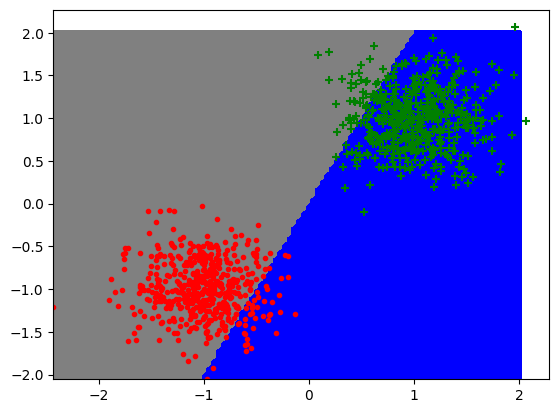

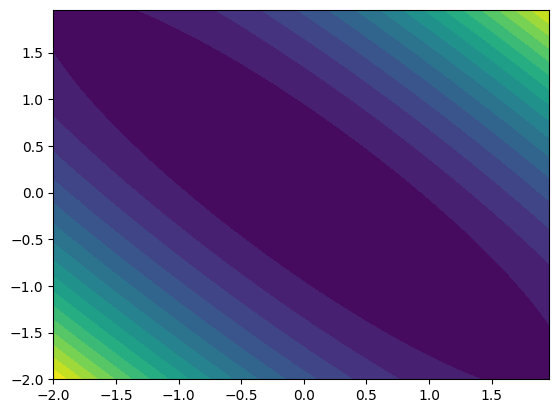

In [82]:
import numpy as np
import matplotlib.pyplot as plt

from mltools import plot_data, plot_frontiere, make_grid, gen_arti


def mse(w,x,y):
    return (y-np.dot(x,w))**2

def mse_grad(w,x,y):
    # a implémenter
    return 2*x*(-y+np.dot(x,w))
def reglog(w,x,y):
    #a implémenter
    sigmoid=1/(1+np.exp(np.dot(x,w)))
    res=((y-sigmoid)**2)/2
    print(res.mean())
    return res
def reglog_grad(w,x,y):
    #a implémenter
    yhat=np.dot(x.T,w)
    return np.dot(x.T,y-yhat)

def check_fonctions():
    ## On fixe la seed de l'aléatoire pour vérifier les fonctions
    np.random.seed(0)
    datax, datay = gen_arti(epsilon=0.1)
    wrandom = np.random.randn(datax.shape[1],1)
    assert(np.isclose(mse(wrandom,datax,datay).mean(),0.54731,rtol=1e-4))
    assert(np.isclose(reglog(wrandom,datax,datay).mean(), 0.57053,rtol=1e-4))
    assert(np.isclose(mse_grad(wrandom,datax,datay).mean(),-1.43120,rtol=1e-4))
    #assert(np.isclose(reglog_grad(wrandom,datax,datay).mean(),-0.42714,rtol=1e-4))
    np.random.seed()


if __name__=="__main__":
    ## Tirage d'un jeu de données aléatoire avec un bruit de 0.1
    datax, datay = gen_arti(epsilon=0.1)
    ## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
    grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)
    
    plt.figure()
    ## Visualisation des données et de la frontière de décision pour un vecteur de poids w
    w  = np.random.randn(datax.shape[1],1)
    plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
    plot_data(datax,datay)

    ## Visualisation de la fonction de coût en 2D
    plt.figure()
    plt.contourf(x_grid,y_grid,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x_grid.shape),levels=20)
    


In [83]:
check_fonctions()

0.6931979689439136


AssertionError: 